# Visualizing Distributions

Two useful functions from the Seaborn library for exploring data distributions are:

- `sns.histplot()`
- `sns.kdeplot()`

If we want to see the shape of a data distribution, the **histogram** can be a good choice. From a histogram we can easily see if a data distribution:

If we want to understand the shape of a data distribution, the **histogram** is often a good place to start. A histogram shows how frequency values occur across the range of your data, helping us quickly see whether the distribution:

* is unimodal (one peak) or multimodel (multiple peaks)
* has *skew*, or is *symmetrical*
* differs between two or more samples

In this section, we’ll learn how to create a histogram in Python using Seaborn, and how to make choices—such as the number of bins, color, and transparency—that help us show the data clearly and accurately.

**Here is a video about the use of histograms**

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/duALLohtvms?si=-om7mGr3-2G9yOWu" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


We’ll also consider some of the limitations of histograms, especially when working with small datasets, and explore a related visualization: the **Kernel Density Estimate (KDE)** plot. A KDE plot shows a smoothed version of the distribution and can sometimes reveal patterns that are hidden by the choice of histogram bins.

**Here is a video about KDE plots**

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/dN-H6nDuvOg?si=Ai0DbJ--aTYHZ9E8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Overview

**Key things to consider when plotting distributions**

When creating a histogram and KDE plots, think carefully about how your choices affect what the viewer perceives:

* **Bin width (histogram)**
  * Narrow bins show more detail, but can make it harder to see the overall pattern.
  * Wider bins smooth out random variation but may hide important structure.


* **Bin boundaries (KDE)**
  * controls how smooth the KDE curve appears
  * where the bins start and end can change the apparent shape of the distribution.


*You may want to align these choices with round numbers or other meaningful points in your data.*

## Example

We will look at a small sample of height data (these are made-up data designed for the exercise).

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/tallVshort.jpg" width="50%" />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries.

**NOTE:** Here we are importing the library `seaborn` using the alias `sns`, and `matplotlib` as `plt`. These will be the most relevant for plotting.

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

### Load and inspect the data

Load the file BodyData.csv which contains body measurements for 50 (fictional) people. The code block below will load the data automatically from the internet.

In [2]:
heightData = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BodyData.csv')
display(heightData)

,ID,sex,height,weight,age
0,101708,M,161,64.8,35
1,101946,F,165,68.1,42
2,108449,F,175,76.6,31
3,108796,M,180,81.0,31
4,113449,F,179,80.1,31
5,114688,M,172,74.0,42
6,119187,F,148,54.8,45
7,120679,F,160,64.0,44
8,120735,F,188,88.4,32
9,124269,F,172,74.0,29


## Histogram

Let's start by plotting a histogram of the data to gain an insight into the **distribution of heights**.

We'll use the `Seaborn` function `sns.histplot()`, which makes it easy to create clear and flexible histograms with just a single line of code.

Before we start let's review some key parameters of this function. You will not need to use *all* of these parameters with every call to `sns.histplot()` but this should give you some sense of different ways you can customise your histogram to represent your data:

* `data`: the name of the dataset (e.g. a Pandas DataFrame) that contains the variable you want to plot.
* `x`: specifies which variable from your dataset should appear on the x-axis (i.e. the variable whose distribution you want to visualise).
* `hue`: adds a categorical variable by which to divide the data into subgroups, plotting each subgroup in a different color (note, this may be useful when you want to compare distributions between groups
* `bins`: controls how many/which bins (bars) are used in the histogram
* `color`, `edgecolor`, `alpha`: controls the appearance of the bars(fill color, border colour, and transparency).

Below you can get an initial sense of the data. What do you notice?

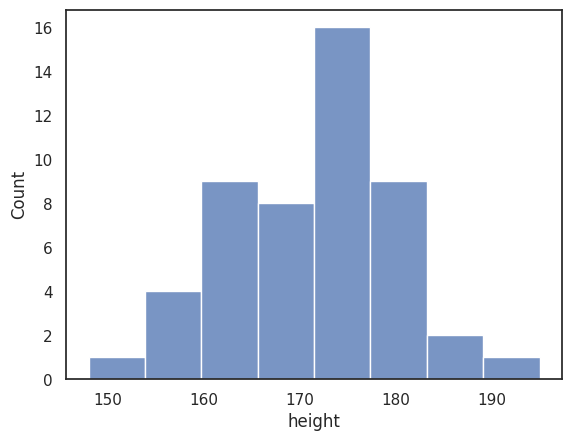

In [3]:
sns.histplot(data = heightData, x="height")
plt.xlabel('height') # set the x axis label
plt.show(); # this command asks Python to output the plot created above

If we want to *disaggregate* (separate out) the data, for example by sex, this is super easy using the `hue` property in `Seaborn` functions:

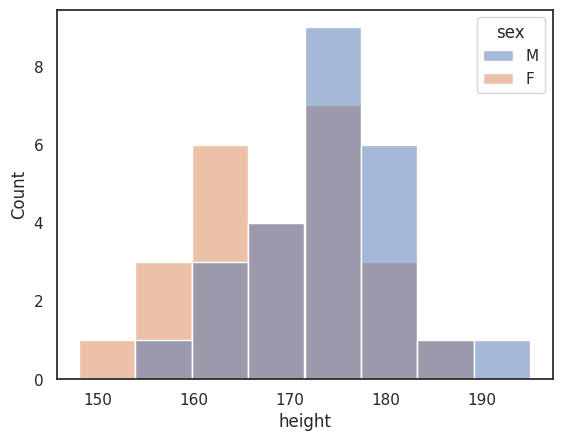

In [4]:
sns.histplot(data = heightData, x="height", hue="sex")
plt.xlabel('height') # set the x axis label
plt.show() # this command asks Python to output the plot created above

### Choosing the bin boundaries and width

In a histogram, we group data into *bins*, and count how many data values fall into each bin. By default, `Seaborn` chooses a set of bins that its algorithm thinks will best display the shape of the data distribution. However, we may prefer to set the bin widths to values that are more easily interpretable.

For example, in the plot below, I’ve used 5 cm-wide bins to group heights across a range from 150 cm to 200 cm, covering all the data points in my sample. This way, it’s easy to read directly from the graph how many individuals fall within a specific range (for example, between 170 cm and 175 cm).


* Can you find where in the code this is specified?


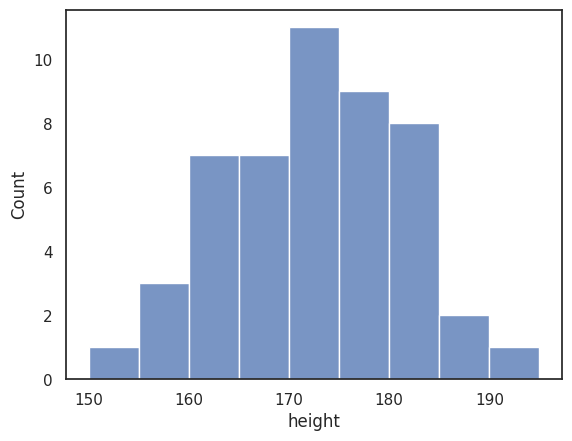

In [5]:
sns.histplot(data = heightData, x="height", bins = range(150,200,5))
plt.show() # this command asks Python to output the plot created above

### Histogram is unstable for small $n$

One limitation of histograms is that when you have a small number of data points (a small $n$), the apparent shape of the distribution can depend heavily on where the bin boundaries fall. Even small shifts in the bin positions can make the distribution look quite different, which can be misleading if you try to draw conclusions about the data’s true shape.

Below is an example showing the same set of height measurements, grouped into 5 cm bins, but with the bin boundaries shifted slightly. Notice how the overall appearance of the histogram changes, even though the underlying data are identical:


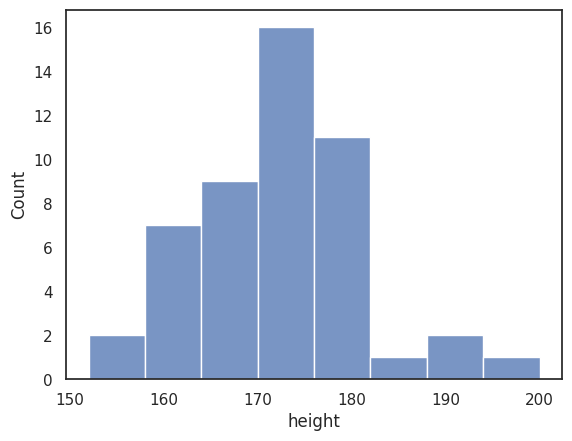

In [11]:
sns.histplot(data = heightData, x="height", bins = range(152,202,6))
plt.show()

Compare the histogram below to the one above, where the bin boundaries were set at 150, 155, 160, etc. The overall shape of the distribution looks quite different!

In the first plot, we seem to have quite a broad distribution, whereas in the bottom one, there is a big spike of people with heights betweem 172 and 177 cm. However, it’s important to remember that this spike reflects only a small number of individuals. If you look closely at the y-axis, the apparent difference in shape corresponds to just a few people.

Moving the bin boundaries changed how many observations fell in each bin and thus the shape of the histogram. This can happen easily just due to chance when you have a small number of observations in each bin. This means that moving just one or two observations between bins makes a big difference to the apparent shape of the histogram.

For this reason, a histogram may not always be the best way to visualise the data when your sample size is small.

#### Exercises
* What change in the code moved the bin boundaries?
* What were the old bin boundaries? What are the new bin boundaries?
* Create a new histogram in which the bin boundaries are at 153,158,163 etc

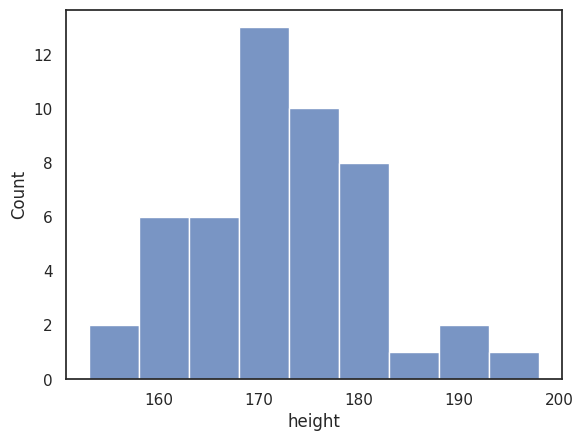

In [10]:
sns.histplot(data = heightData, x="height", bins = range(153,203,5))
plt.show()

### Bin width

The code above creates histograms of the people's heights. You can copy and paste it, then modify it, to complete the following exercise:

* create a histogram with bin widths of 1cm - can you guess how to do this?
  * *hint: to achieve this there is an option to use exactly the code you used above, with a few modifications, or you can use the parameter `binwidth`*

**note** the histogram looks much spikier with 1cm bins and it becomes hard to see the overall shape of the distribution

## KDE plot

While a histogram shows the number of observations within a set of discrete bins, a Kernel Density Estimate (KDE) plot provides a smooth, continuous estimate of the underlying data distribution. You can think of a KDE plot as the average of all the histograms you would get if you tried every possible set of bin boundaries (for a fixed bin width). This produces a **smoother curve** that highlights the overall shape of the distribution without depending on specific bin placements.

We can easily add a KDE curve to a histogram by including an additional <i>argument</i> in the Seaborn function `sns.histplot()`.

Below, we reproduce the two histograms of heights (with different bin boundaries) — but this time we also add the KDE plot:

* Although the histograms look quite different, the KDE plots are identical.
* This shows how the KDE helps reveal the true underlying pattern, independent of arbitrary bin boundaries.

**note:** *I used some additional commands from `Matplotlib` to make sure the x and y axes cover the same range of values for both plots, to make them easier to compare*

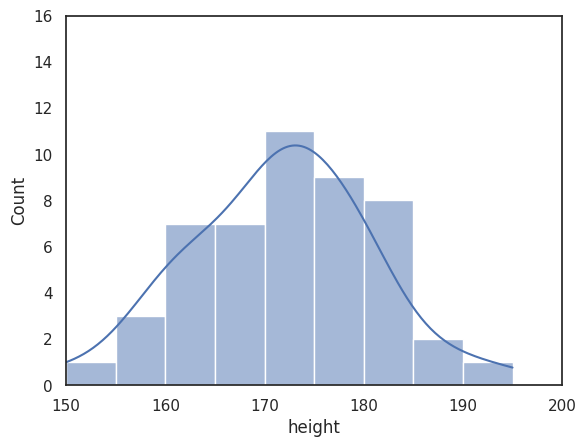

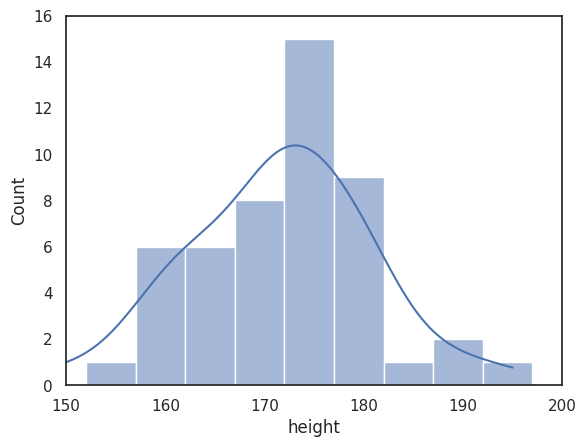

In [12]:
sns.histplot(data = heightData, x="height", bins = range(150,200,5), kde="True")
plt.xlim(150,200)
plt.ylim(0,16)
plt.show()
# note that without the command plt.show(), Jupyter will put all plots onto the same axes,
# or (if that is impossible, eg when different plot types were used)
# display only the final plot created in the cell

sns.histplot(data = heightData, x="height", bins = range(152,202,5), kde="True")
plt.xlim(150,200)
plt.ylim(0,16)
plt.show()



#### Exercises

* Can you find the extra argument that adds the KDE plot?
* Try to switch the KDE plot off!

## KDE plot (without histogram)

If you don't want the histogram, you can plot the KDE plot independently (without a histogram), using the `Seaborn` function `sns.kdeplot()`. You'll find many of the basic parameters are the same as `sns.histplot`.

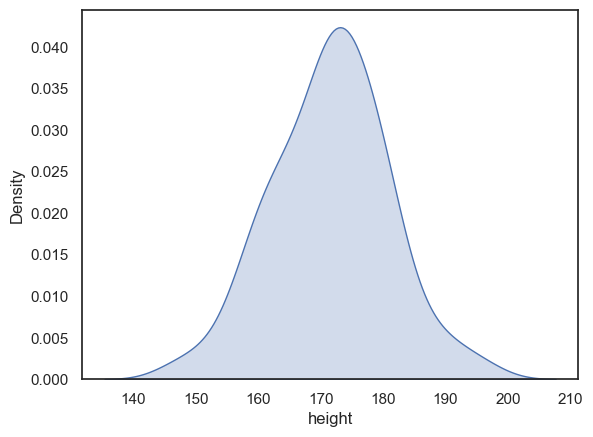

In [ ]:
sns.kdeplot(data = heightData, x="height", fill=True) # I think KDE plots look nice filled with shading, hence fill=True
plt.xlabel('height') # set the x axis label
plt.show()

### Probability density

When we plot the KDE as a standalone (rather than over a histogram) the y-axis changes from **'Count'** to **'Density'**

The values on this axis are scaled so that the total area under the KDE curve equals 1. This makes the KDE a *probability density function* which means that probabilities can be interpreted as areas under the curve.

For example, the probability that a randomly selected person from our sample has a height between 160 cm and 170 cm is equal to the area under the curve between those two points.

In this example:

* The width of the interval is 10 cm
* The average density over that range is approximately 0.025
* So, <tt>10×0.025=0.25</tt> or 25% of the sample falls between 160 cm and 170 cm.
*
<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/densityFig.png" width="50%" />


One important consequence of this scaling is that, unlike a histogram, a KDE plot **does not show the sample size**. That means the curve looks the same whether it’s based on 20 observations or 2,000. This matters because larger samples tend to represent the population more reliably.

To address this limitation, you can add a `rug plot`, which marks each individual data point along the x-axis. This combination gives you the *best of both worlds*: a smooth density curve and a visual indication of how many data points contributed to it.

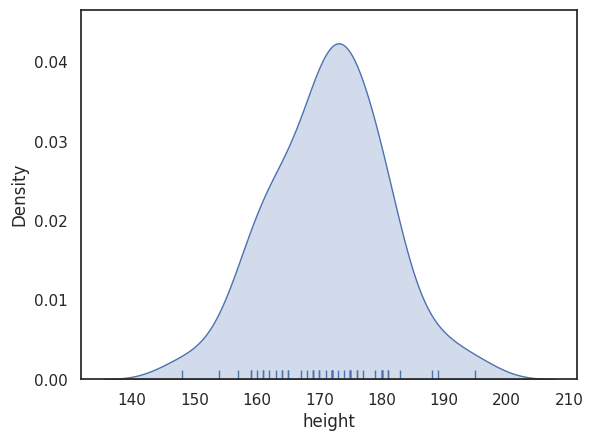

In [13]:
sns.kdeplot(data = heightData, x="height", fill=True)
sns.rugplot(data = heightData, x="height")
plt.xlabel('height') # set the x axis label
plt.show()

### Bandwidth

Earlier, we described the KDE plot as being like an average of all possible histograms you would get if you tried every possible set of bin boundaries (for example, bins starting at 150, 155, 160 vs. 151, 156, 161, and so on).

That’s true, but there’s a catch: this “averaging” is done for one specific `bin width`, which is automatically chosen by the computer to produce a (generally) good-looking result.

Just as changing the **bin width** in a histogram affects the balance between showing the overall shape of the distribution (with wide bins) and revealing fine details (with narrow bins), the *bandwidth* in a KDE plot controls the same trade-off:

* A smaller bandwidth makes the KDE curve more sensitive to small variations in the data (more detailed but also noisier).

* A larger bandwidth produces a smoother, more general shape (less detailed but clearer overall).

The code below shows the height KDE with three bandwidths. The argument <tt>bw_adjust</tt> is a scaling factor for the default bandwidth chosen by the computer:

* If <tt>bw_adjust = 1.0</tt> the default bandwidth is used (grey KDE)
* If <tt>bw_adjust = 0.5</tt>, a narrower bandwith of half the default is used (red KDE)
* If <tt>bw_adjust = 2.0</tt>, a wider bandwith of twice the default is used (blue KDE)



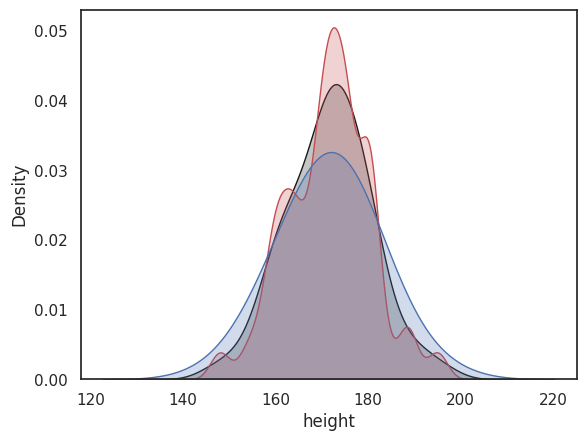

In [14]:
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=1.0, color='k')
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=0.5, color='r')
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=2.0, color='b')
plt.xlabel('height') # set the x axis label
plt.show()

**Note** With its high bandwidth, the blue KDE plot looks very smooth with just one peak.

In contrast, with low bandwidth, the red KDE plot tracks local peaks in the data distribution, resulting in lots of little bumps in the KDE plot.

#### Exercise

Try out some different values for <tt>bw_adjust</tt> - can you make the KDE plot go even wobblier? or even smoother?

## Considerations when comparing distributions

Both histograms and KDE plots are useful for visualising the shape of a data distribution. Because of this, they’re also excellent tools for comparing how two (or more) groups differ in shape, spread, and central tendency.

One simple way to compare two groups within the same plot is to overlay their histograms or KDE curves using the `hue` parameter in Seaborn, like we've seen earlier. The `hue` property automatically separates the data by group and assigns different colours to each category, allowing for a clear visual comparison of the distributions.


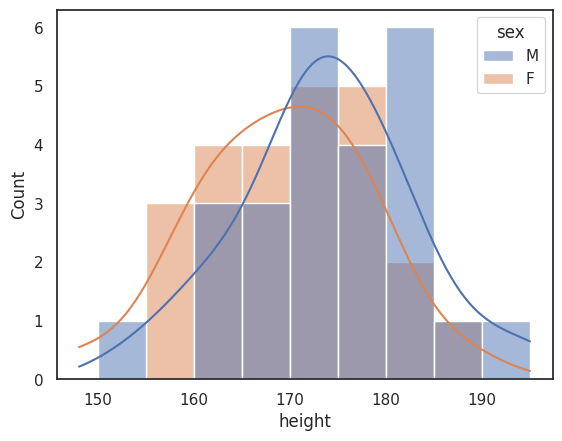

In [15]:
sns.histplot(data = heightData, x="height", hue='sex', kde = True, bins = range(150,200,5))
plt.show()

You might find that too crowded in which case you may want to separate out the plots onto two separate axes:

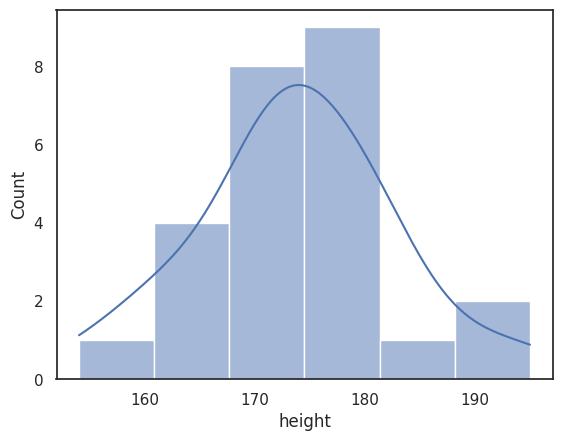

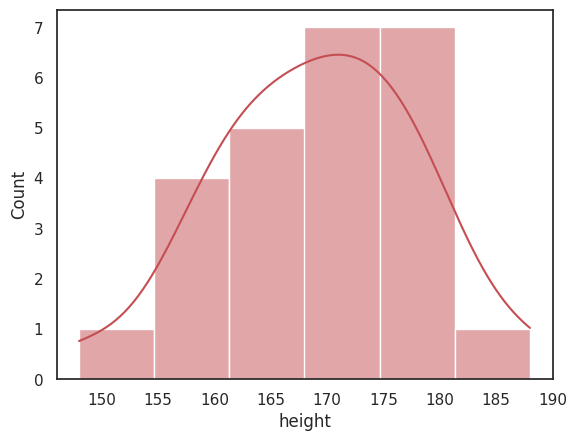

In [16]:
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', kde = True)
plt.show()

sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', kde = True)
plt.show()

However, when we try to compare the two plots on separate axes, the matter is confused by non-matching axis ranges

* It looks like there are more tall women than tall men, because the peak fo the distribution is further right for the women - but check out the numbers on the $x$-axes
* The most common bin for men contains 9 people, but for women, 7 people - this is not immediately apparent as the $y$-axes don't match
* luckily `seaborn` grouped both men and women into 6 bins - but the bin widths are not actually the same in the two plots

To make the plots more directly comparable, we should fix the range of $x$ and $y$ axes and the bin boundaries on both plots:

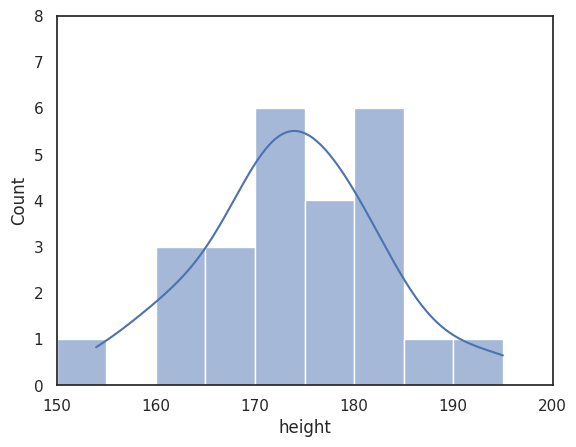

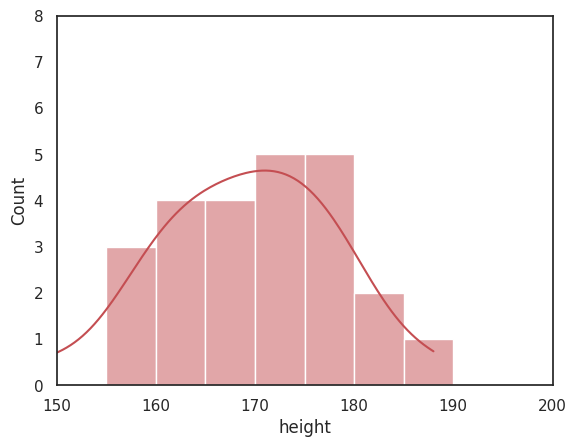

In [19]:
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', bins=range(150,200,5), kde = True)
plt.xlim(150,200)
plt.ylim(0,8)
plt.show()

sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', bins=range(150,200,5), kde = True)
plt.xlim(150,200)
plt.ylim(0,8)
plt.show()

## Customizing the appearance of your plots

I told you that `seaborn` produces publication quality figures, but some of the figures above look a bit ugly.

We can easily change the appearance of our plots using some additional arguments to the functions `sns.histplot()` and `sns.kdeplot()`.

You can find many examples of how to change the appearance of histograms and KDE plots in the `seaborn` manual pages:
for <a href='https://seaborn.pydata.org/generated/seaborn.histplot.html'><tt>sns.histplot()</tt></a> and <a href='https://seaborn.pydata.org/generated/seaborn.kdeplot.html'><tt>sns.kdeplot()</tt></a>      

